In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_description = '/content/drive/MyDrive/Colab Notebooks/house-votes-84.names'
path_to_data = '/content/drive/MyDrive/Colab Notebooks/house-votes-84.data'

In [4]:
votes = (np.loadtxt(path_to_data,delimiter=',',dtype=object,unpack=True)).T
print(votes.shape)
print(votes)

(435, 17)
[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' '?']
 ['democrat' '?' 'y' ... 'y' 'n' 'n']
 ...
 ['republican' 'n' '?' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' '?' 'n']]


In [6]:
for i in range(435):
  temp = votes[i]
  for j in range(17):
    if temp[j] == 'republican' or temp[j] == 'y':
      votes[i,j] = 1
    elif temp[j] == 'democrat' or temp[j] == 'n':
      votes[i,j] = -1
    elif temp[j] == '?':
      votes[i,j] = 0

X = votes[:,1:17]
y = votes[:,0]
print(X.shape)
print(y.shape)

(435, 16)
(435,)


In [7]:
def eta(tt,rr):
  val = np.exp(-(tt**2)/(2*rr**2))
  return val.astype(float)

In [10]:
import scipy.spatial
dist = scipy.spatial.distance_matrix(X,X,p=2)
r = np.arange(0.1,4,0.01)
acc = []
for i in r:
  W = eta(dist,i)
  d = np.sum(W,axis=1)
  D = np.diag(d)
  L = D-W
  ll, VV = np.linalg.eigh(L)
  idx = ll.argsort()
  l = ll[idx]
  V = VV[:,idx]
  classifier = np.sign(V[:,1])
  mismem1 = np.sum(np.not_equal(classifier,y))
  mismem2 = np.sum(np.not_equal(classifier,-y))
  acc_temp = 1-min(mismem1,mismem2)/435
  acc.append(acc_temp)


In [11]:
idx = np.argmax(acc)
print(idx)
sigma = r[idx]
accuracy = acc[idx]
print(sigma,accuracy)

106
1.1599999999999995 0.8804597701149426


Text(1.1599999999999995, 0.8804597701149426, '$\\sigma^*$')

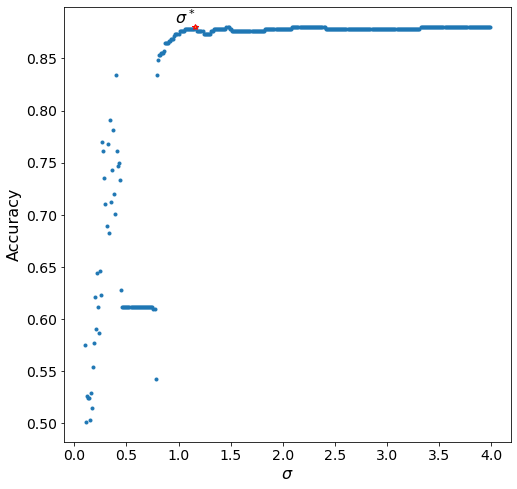

In [12]:
plt.figure(figsize=(8,8))
plt.plot(r,acc,'.')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$\sigma$',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(sigma,accuracy,marker='*',mec='r')
plt.text(sigma,accuracy,'$\sigma^*$',verticalalignment='bottom',horizontalalignment='right',fontsize=16)

In [25]:
dist = scipy.spatial.distance_matrix(X,X,p=2)
r = sigma
W = eta(dist,r)
d = np.sum(W,axis=1)
D = np.diag(d)
L = D-W
ll, VV = np.linalg.eigh(L)
idx = ll.argsort()
l = ll[idx]
V = VV[:,idx]

In [19]:
from sklearn.linear_model import Ridge

In [26]:
M = [2,3,4,5,6]
J = [5,10,20,40]
SSLacc = np.zeros((5,4))
for i in range(5):
  for j in range(4):
    F = V[:,0:M[i]]
    A = V[0:J[j],0:M[i]]
    b = y[0:J[j]]
    SSLRidge = Ridge(alpha = 1e-8, fit_intercept=False)
    SSLRidge.fit(A,b)
    c_hat = SSLRidge.coef_
    y_hat = np.sign(np.dot(F,c_hat))
    mismem1 = np.sum(np.not_equal(y_hat,y))
    mismem2 = np.sum(np.not_equal(y_hat,-y))
    acc_temp = 1-min(mismem1,mismem2)/435
    SSLacc[i,j] = acc_temp
print(SSLacc)
idx = np.argmax(SSLacc)

[[0.88965517 0.88735632 0.88275862 0.88045977]
 [0.88965517 0.82068966 0.82298851 0.83908046]
 [0.83908046 0.85747126 0.86436782 0.87586207]
 [0.86666667 0.75402299 0.84137931 0.87816092]
 [0.89195402 0.72873563 0.87586207 0.86436782]]
